You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.


Import libraries

In [202]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import csv files

In [203]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/train_aWnotuB.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/test_BdBKkAj.csv')
#Reading sample submission file:
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/sample_submission_EZmX9uE.csv')

In [204]:
train

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [205]:
test

DateTime  Junction           ID
0      2017-07-01 00:00:00         1  20170701001
1      2017-07-01 01:00:00         1  20170701011
2      2017-07-01 02:00:00         1  20170701021
3      2017-07-01 03:00:00         1  20170701031
4      2017-07-01 04:00:00         1  20170701041
...                    ...       ...          ...
11803  2017-10-31 19:00:00         4  20171031194
11804  2017-10-31 20:00:00         4  20171031204
11805  2017-10-31 21:00:00         4  20171031214
11806  2017-10-31 22:00:00         4  20171031224
11807  2017-10-31 23:00:00         4  20171031234

[11808 rows x 3 columns]

In [206]:
sample

Empty DataFrame
Columns: [ID, Vehicles]
Index: []

Check for null values

In [207]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [208]:
test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

Add weekday to frame

In [209]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')
test['DateTime'] = pd.to_datetime(test['DateTime'], errors='coerce')

train['dayofweek'] = train['DateTime'].dt.dayofweek
test['dayofweek'] = test['DateTime'].dt.dayofweek

train['weekofyear'] = train['DateTime'].dt.week
test['weekofyear'] = test['DateTime'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [210]:
train

DateTime  Junction  ...  dayofweek  weekofyear
0     2015-11-01 00:00:00         1  ...          6          44
1     2015-11-01 01:00:00         1  ...          6          44
2     2015-11-01 02:00:00         1  ...          6          44
3     2015-11-01 03:00:00         1  ...          6          44
4     2015-11-01 04:00:00         1  ...          6          44
...                   ...       ...  ...        ...         ...
48115 2017-06-30 19:00:00         4  ...          4          26
48116 2017-06-30 20:00:00         4  ...          4          26
48117 2017-06-30 21:00:00         4  ...          4          26
48118 2017-06-30 22:00:00         4  ...          4          26
48119 2017-06-30 23:00:00         4  ...          4          26

[48120 rows x 6 columns]

In [211]:
test

DateTime  Junction           ID  dayofweek  weekofyear
0     2017-07-01 00:00:00         1  20170701001          5          26
1     2017-07-01 01:00:00         1  20170701011          5          26
2     2017-07-01 02:00:00         1  20170701021          5          26
3     2017-07-01 03:00:00         1  20170701031          5          26
4     2017-07-01 04:00:00         1  20170701041          5          26
...                   ...       ...          ...        ...         ...
11803 2017-10-31 19:00:00         4  20171031194          1          44
11804 2017-10-31 20:00:00         4  20171031204          1          44
11805 2017-10-31 21:00:00         4  20171031214          1          44
11806 2017-10-31 22:00:00         4  20171031224          1          44
11807 2017-10-31 23:00:00         4  20171031234          1          44

[11808 rows x 5 columns]

Prepare data

In [212]:
ID_train = train.ID
ID_test = test.ID

In [213]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)
train

DateTime  Junction  Vehicles  dayofweek  weekofyear
0     2015-11-01 00:00:00         1        15          6          44
1     2015-11-01 01:00:00         1        13          6          44
2     2015-11-01 02:00:00         1        10          6          44
3     2015-11-01 03:00:00         1         7          6          44
4     2015-11-01 04:00:00         1         9          6          44
...                   ...       ...       ...        ...         ...
48115 2017-06-30 19:00:00         4        11          4          26
48116 2017-06-30 20:00:00         4        30          4          26
48117 2017-06-30 21:00:00         4        16          4          26
48118 2017-06-30 22:00:00         4        22          4          26
48119 2017-06-30 23:00:00         4        12          4          26

[48120 rows x 5 columns]

In [214]:
train.rename(columns={'DateTime':'ds', 'dayofweek': 'add1','weekofyear': 'add2','Junction': 'add3', 'Vehicles': 'y'}, inplace=True)
test.rename(columns={'DateTime':'ds',  'dayofweek': 'add1','weekofyear': 'add2', 'Junction': 'add3'}, inplace=True)
train

ds  add3   y  add1  add2
0     2015-11-01 00:00:00     1  15     6    44
1     2015-11-01 01:00:00     1  13     6    44
2     2015-11-01 02:00:00     1  10     6    44
3     2015-11-01 03:00:00     1   7     6    44
4     2015-11-01 04:00:00     1   9     6    44
...                   ...   ...  ..   ...   ...
48115 2017-06-30 19:00:00     4  11     4    26
48116 2017-06-30 20:00:00     4  30     4    26
48117 2017-06-30 21:00:00     4  16     4    26
48118 2017-06-30 22:00:00     4  22     4    26
48119 2017-06-30 23:00:00     4  12     4    26

[48120 rows x 5 columns]

Graph data

Text(0, 0.5, 'y')

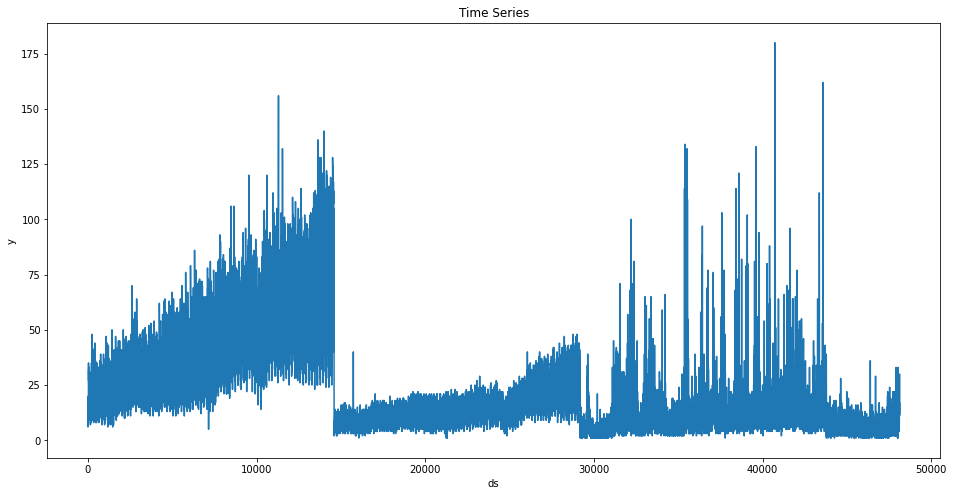

In [215]:
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split training set for testing and validation

In [216]:
X_train = train.loc[train["ds"]<"2017-01-01"]
X_val  = train.loc[train["ds"]>="2017-01-01"]
X_test = test.loc[test["ds"]>="2017-07-01"]

FB Prophet

In [217]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.add_regressor('add1')
model.add_regressor('add3')
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Predict on validation set

In [218]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

ds      trend  ...  multiplicative_terms_upper       yhat
0     2017-01-01 00:00:00  26.617990  ...                         0.0  34.066267
1     2017-01-01 00:00:00  26.617990  ...                         0.0   9.497563
2     2017-01-01 00:00:00  26.617990  ...                         0.0  21.781915
3     2017-01-01 00:00:00  26.617990  ...                         0.0  -2.786789
4     2017-01-01 01:00:00  26.617697  ...                         0.0   6.820840
...                   ...        ...  ...                         ...        ...
17371 2017-06-30 22:00:00  25.346542  ...                         0.0  41.518775
17372 2017-06-30 23:00:00  25.346249  ...                         0.0  27.492685
17373 2017-06-30 23:00:00  25.346249  ...                         0.0  39.777037
17374 2017-06-30 23:00:00  25.346249  ...                         0.0  15.208333
17375 2017-06-30 23:00:00  25.346249  ...                         0.0   2.923981

[17376 rows x 28 columns]

In [219]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

30.707594039042693


In [220]:
df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

actual  predicted
0          27         34
1          23          9
2          17         21
3          16         -2
4          16          6
...       ...        ...
17371      11         41
17372      30         27
17373      16         39
17374      22         15
17375      12          2

[17376 rows x 2 columns]

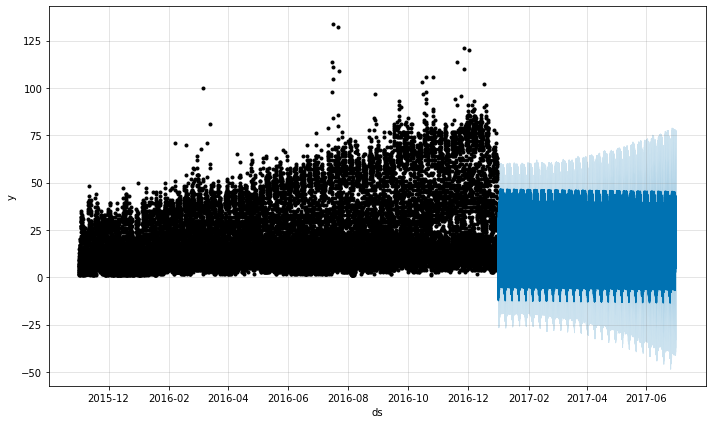

In [221]:
fig1 = model.plot(forecast)

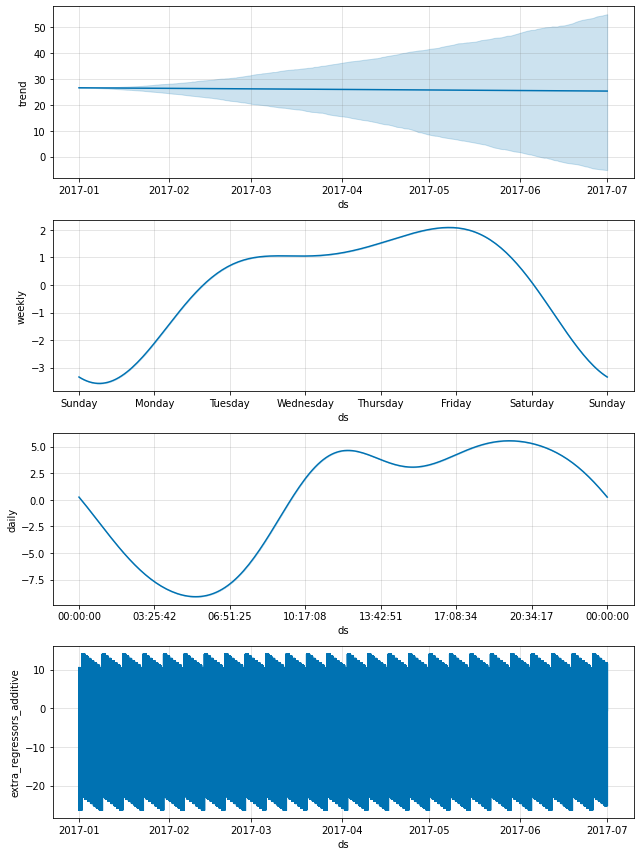

In [222]:
fig2 = model.plot_components(forecast)

In [197]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [198]:
plot_components_plotly(model, forecast)

Predict on test set

In [199]:
prediction = model.predict(X_test)
prediction

ds      trend  ...  multiplicative_terms_upper       yhat
0     2017-07-01 00:00:00  25.631695  ...                         0.0  24.814845
1     2017-07-01 00:00:00  25.631695  ...                         0.0  24.814845
2     2017-07-01 00:00:00  25.631695  ...                         0.0  24.814845
3     2017-07-01 00:00:00  25.631695  ...                         0.0  24.814845
4     2017-07-01 01:00:00  25.631456  ...                         0.0  22.049638
...                   ...        ...  ...                         ...        ...
11803 2017-10-31 22:00:00  24.926372  ...                         0.0  31.223310
11804 2017-10-31 23:00:00  24.926133  ...                         0.0  29.628088
11805 2017-10-31 23:00:00  24.926133  ...                         0.0  29.628088
11806 2017-10-31 23:00:00  24.926133  ...                         0.0  29.628088
11807 2017-10-31 23:00:00  24.926133  ...                         0.0  29.628088

[11808 rows x 25 columns]

In [223]:
output = pd.DataFrame({'ID': ID_test, 'Vehicles': prediction.yhat.values.astype(int)})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [201]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

ID  Vehicles
0      20170701001        24
1      20170701011        24
2      20170701021        24
3      20170701031        24
4      20170701041        22
...            ...       ...
11803  20171031194        31
11804  20171031204        29
11805  20171031214        29
11806  20171031224        29
11807  20171031234        29

[11808 rows x 2 columns]